Autor: Leonardo Almeida Farias

#Imports

In [ ]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [ ]:
path_data = "https://raw.githubusercontent.com/Guardians-DSC/dados/main/orcamento/consulta_siop_orcamento_ufcg.csv"
dados = pd.read_csv(path_data)


#Tratando o data frame

Todas ações com o mesmo numero tem função quase igual, pra facilitar a analise vou renomear todas as 8282 e 20RK para a nomenclatura mais nova.

In [ ]:
for linha in dados.index:
  if dados.iloc[linha, 5] == "8282 - Reestruturação e Expansão das Universidades Federais" or dados.iloc[linha, 5] == "8282 - Reestruturação e Modernização das Instituições Federais de Ensino Superior":
    dados.iloc[linha, 5] = "8282 - Reestruturação e Expansão de Instituições Federais de Ensino Superior"
  elif dados.iloc[linha, 5] == "20RK - Funcionamento das Universidades Federais":
    dados.iloc[linha, 5] = "20RK - Funcionamento de Instituições Federais de Ensino Superior"

Similarmente a tabela tem dois valores pra planos orcamentários não detalhados

In [ ]:
for linha in dados.index:
  if dados.loc[linha,"plano_orcamentario"] == "[valor não detalhado]":
    dados.loc[linha,"plano_orcamentario"] = "0000 - Valor não detalhado"

In [ ]:

municipiosInformados = dados[dados["municipio"] != "-"]
municipiosInformados

Transformando os valores em inteiros, para poder se calcular os gastos totais.

In [ ]:
municipiosInformados.dotacao_atual= municipiosInformados.dotacao_inicial.str.replace(".", "")
municipiosInformados.empenhado = municipiosInformados.empenhado.str.replace(".", "")
municipiosInformados.liquidado = municipiosInformados.liquidado.str.replace(".", "")
municipiosInformados.pago = municipiosInformados.pago.str.replace(".", "")
municipiosInformados[["ano", "dotacao_atual", "empenhado", "liquidado", "pago"]] = municipiosInformados[["ano", "dotacao_atual", "empenhado", "liquidado", "pago"]].apply(pd.to_numeric)

In [ ]:
dados.empenhado = dados.empenhado.str.replace(".", "")
dados.empenhado = dados.empenhado.apply(pd.to_numeric)

<ipython-input-4-d9da3ec4dae1>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados.empenhado = dados.empenhado.str.replace(".", "")


#Objetivo


A coluna de municipios é extremamente vazia, das quase 5 mil linha somente 66 tem valores, que torna mais fácil estudar essas exceções e tentar entender o que elas mostram , com uma abordagem explorativa.

Segundo o pro-reitor de planejamento, a coluna se encontra quase vazia porque a faculdade, ao receber o dinheiro do governo, o distribui internamente da sede para os outros campus.

Que dispesas ocorrem com o município informado e para onde vão?

In [ ]:
dados["municipio"].value_counts()

-                           4897
2504009 - Campina Grande      45
2503704 - Cajazeiras          12
2512101 - Pombal               6
2516201 - Sousa                3
Name: municipio, dtype: int64

[Educação de qualidade a todos](https://www.gov.br/cgu/pt-br/assuntos/auditoria-e-fiscalizacao/avaliacao-da-gestao-dos-administradores/prestacao-de-contas-do-presidente-da-republica/arquivos/2016/relatorio-de-custos-programa-2080.pdf)

# Analise da coluna "Objetivo"

In [ ]:
municipiosInformados.objetivo.value_counts()

1010 - Ampliar o acesso à educação superior de qualidade, na...         28
0841 - Ampliar o acesso à educação superior com condições de...         27
1237 - Fomentar a formação de pessoal qualificado, fortalecendo a...    11
Name: objetivo, dtype: int64

Como se espera o 1010 é um objetivo do programa 2080, o 0841 do 2032 e o 1237 do 5013. (Encontrado procurando cada objetivo no google,resultando em documentos explicando cada programa como o [2080](https://www.gov.br/cgu/pt-br/assuntos/auditoria-e-fiscalizacao/avaliacao-da-gestao-dos-administradores/prestacao-de-contas-do-presidente-da-republica/arquivos/2016/relatorio-de-custos-programa-2080.pdf)

Ou seja cada Plano tem exatamente um objetivo representado nessa parte da tabela.

#Ações Orçamentárias

In [ ]:
municipiosInformados.acao.value_counts()

8282 - Reestruturação e Expansão de Instituições Federais de Ensino Superior    41
20RK - Funcionamento de Instituições Federais de Ensino Superior                23
7XE3 - Construção do Hospital Universitário do Sertão (HUS)                      2
Name: acao, dtype: int64

As ações presentes nesse recorte de gastos aparentam ser dispesas simples recorrentes, com exceção da Construção do Hospital Universitário do Sertão (HUS).


Na tabela geral, 20Rk é a ação mais comum, mais de 3 vezes mais frequente que o segundo lugar. Entretanto nos municipios informados 8282 é a mais comum.

Text(0.5, 1.0, 'Quanto foi pago pra cada ação')

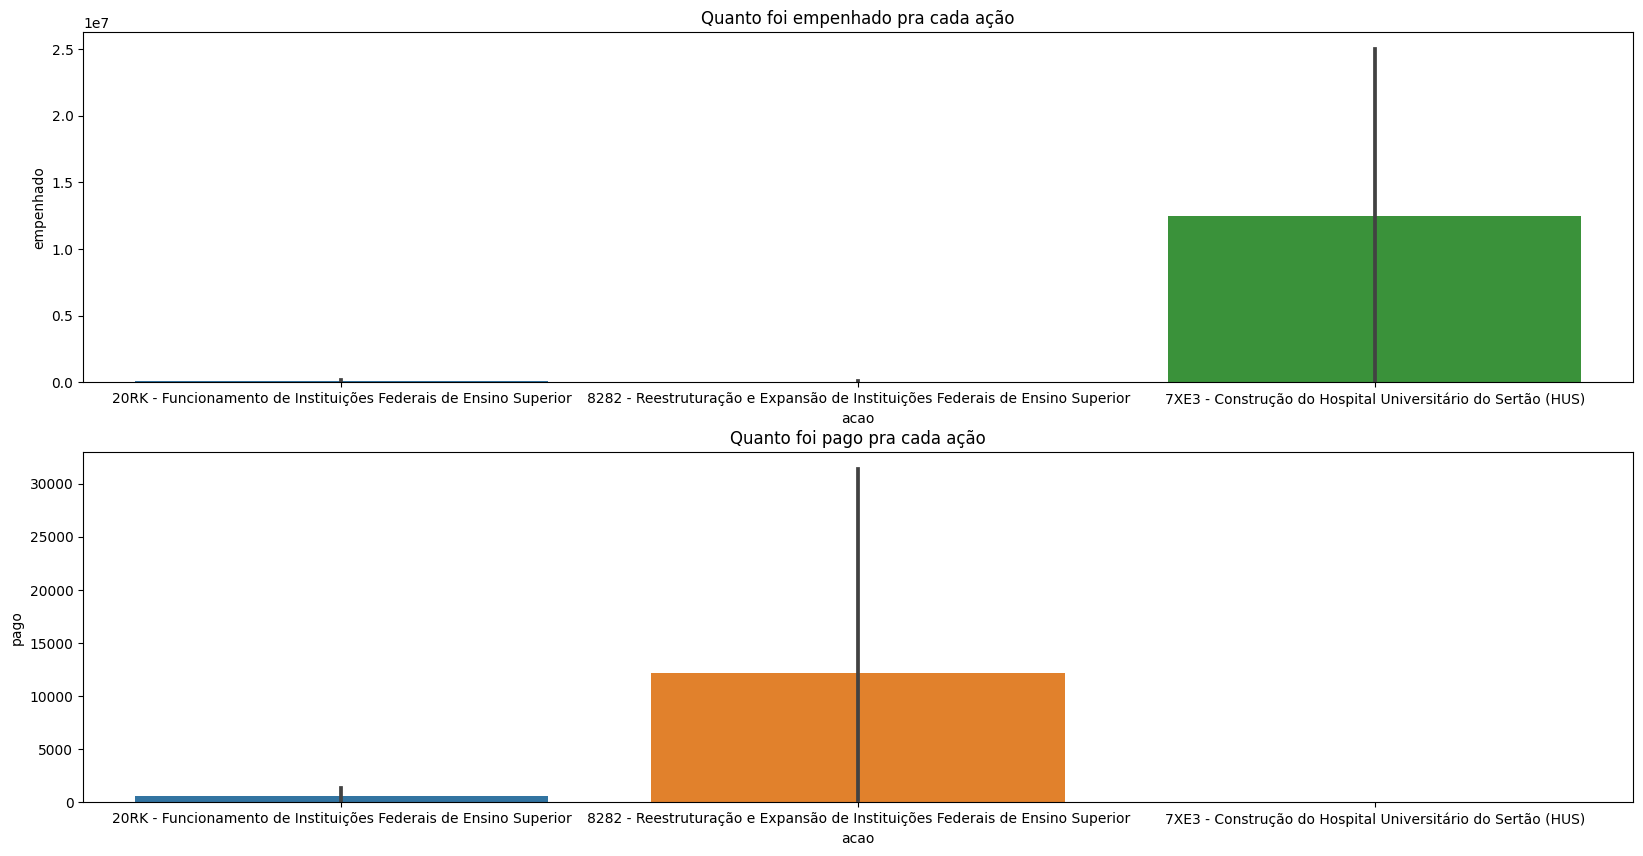

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(2,1,1)
sns.barplot(data = municipiosInformados, x = "acao", y = "empenhado")
plt.title("Quanto foi empenhado pra cada ação")

plt.subplot(2,1,2)
sns.barplot(data = municipiosInformados, x = "acao", y = "pago")
plt.title("Quanto foi pago pra cada ação")

O empenho com o HUS é mais de 100 vezes maior que o segundo maior empenho, sua história é relatada brevemente na conclusão.

Embora o empenho com o HUS seja enorme para os gastos analisado, ele não chega a 5% do empenho total do ano de 2019.

## Quantidade empenhada e paga por ação

In [ ]:
municipiosInformados[municipiosInformados.acao == "7XE3 - Construção do Hospital Universitário do Sertão (HUS)"].municipio.value_counts()

2503704 - Cajazeiras    2
Name: municipio, dtype: int64

In [ ]:
total8282 = municipiosInformados[municipiosInformados.acao == "8282 - Reestruturação e Expansão de Instituições Federais de Ensino Superior"].empenhado.sum()
total20RK = municipiosInformados[municipiosInformados.acao == "20RK - Funcionamento de Instituições Federais de Ensino Superior"].empenhado.sum()
total7XE3 = municipiosInformados[municipiosInformados.acao == "7XE3 - Construção do Hospital Universitário do Sertão (HUS)"].empenhado.sum()
total8282, total20RK, total7XE3

(2141987, 1896906, 25000000)

In [ ]:
dados[dados.ano == 2019].empenhado.sum()

736258721

In [ ]:
pago8282 = municipiosInformados[municipiosInformados.acao == "8282 - Reestruturação e Expansão de Instituições Federais de Ensino Superior"].pago.sum()
pago20RK = municipiosInformados[municipiosInformados.acao == "20RK - Funcionamento de Instituições Federais de Ensino Superior"].pago.sum()
pago7XE3 = municipiosInformados[municipiosInformados.acao == "7XE3 - Construção do Hospital Universitário do Sertão (HUS)"].pago.sum()
pago8282, pago20RK, pago7XE3

(499601, 12768, 0)

#Ano

In [ ]:
municipiosInformados.ano.value_counts().sort_index()

2012    21
2013     2
2014     2
2015     2
2016    11
2017     2
2018     5
2019    10
2020     5
2021     6
Name: ano, dtype: int64

In [ ]:
quantidade = municipiosInformados.ano.value_counts().sort_index()

porAno = dados.ano.value_counts().sort_index()

Text(0.5, 1.0, 'Quantidade de gastos gerais por ano')

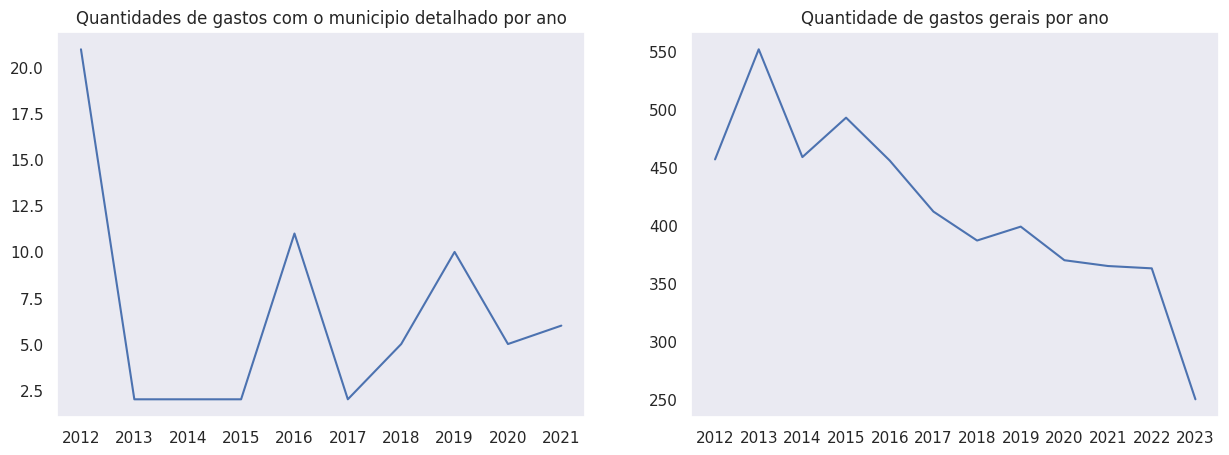

In [ ]:
plt.figure(figsize = (15,5))
sns.set_theme(style = "dark")

plt.subplot(1,2,1)
grafico = sns.lineplot(x = quantidade.index, y = quantidade.values)
plt.title("Quantidades de gastos com o municipio detalhado por ano")

plt.subplot(1,2,2)
grafico2 = sns.lineplot(x = porAno.index, y = porAno.values)
plt.title("Quantidade de gastos gerais por ano")


Observação: os dados foram adquiridos antes do final de 2023, o que explica a falta de gastos nesse ano. Entretanto, municipios não são informados desde 2022.

Nota-se que a quantidade de gastos com o municipio detalhado não segue a tendência de gastos gerais por ano.

##Quanto foi gasto por ano

In [ ]:
anos = list(range(2012, 2022))
empenhos = []
for ano in range(2012,2022):
  empenhos.append(municipiosInformados[municipiosInformados.ano == ano].empenhado.sum())

empenhos

[1110156, 0, 0, 0, 1048029, 0, 249813, 25840368, 499316, 291211]

In [ ]:
pagos = []
for ano in range(2012,2022):
  pagos.append(municipiosInformados[municipiosInformados.ano == ano].pago.sum())

pagos

[5309, 0, 0, 0, 106809, 0, 4959, 0, 395292, 0]

Text(0.5, 1.0, 'Quantidade dotada por ano')

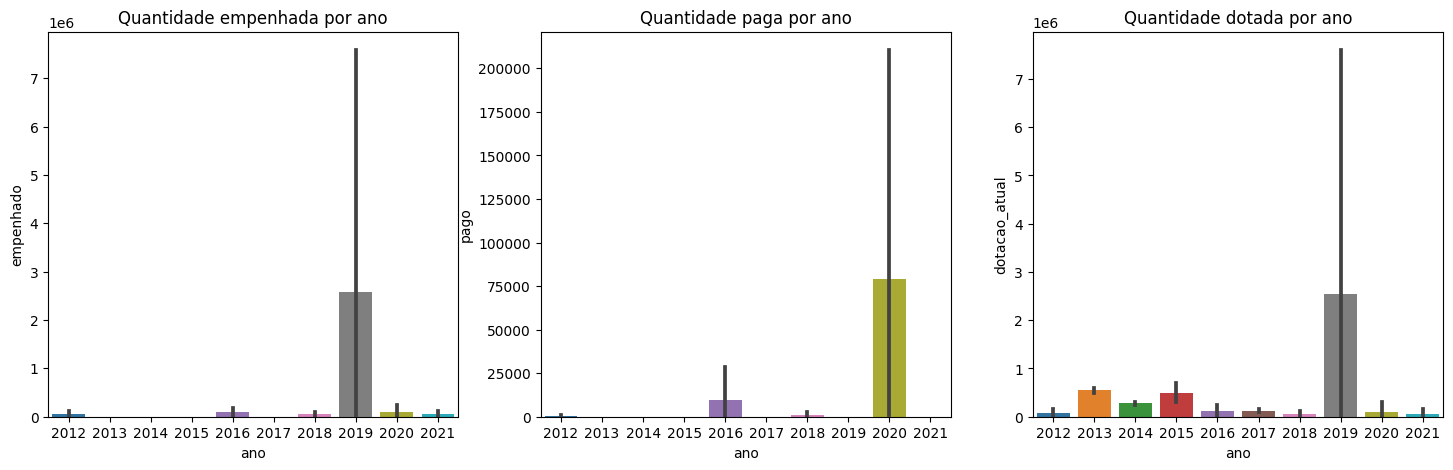

In [ ]:
plt.figure(figsize = (18,5))
plt.subplot(1,3,1)
sns.barplot(data = municipiosInformados, x = "ano", y = "empenhado")
plt.title("Quantidade empenhada por ano")

plt.subplot(1,3,2)
sns.barplot(data = municipiosInformados, x = "ano", y = "pago")
plt.title("Quantidade paga por ano")

plt.subplot(1,3,3)
sns.barplot(data = municipiosInformados, x = "ano", y = "dotacao_atual")
plt.title("Quantidade dotada por ano")

Text(0.5, 1.0, 'Empenhos sem o HUS')

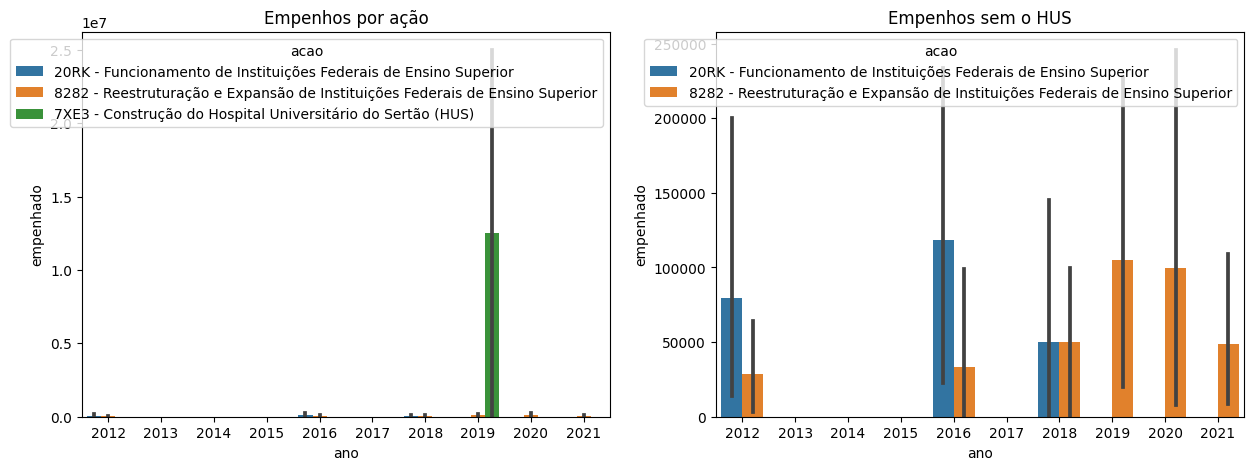

In [ ]:
semHUS = municipiosInformados[municipiosInformados.acao != "7XE3 - Construção do Hospital Universitário do Sertão (HUS)"]

plt.figure(figsize =(15,5))
plt.subplot(1,2,1)
sns.barplot(data = municipiosInformados, x = "ano", y = "empenhado", hue = "acao")
plt.title("Empenhos por ação")

plt.subplot(1,2,2)
sns.barplot(data = semHUS, x = "ano", y = "empenhado", hue = "acao")
plt.title("Empenhos sem o HUS")



#Valores totais

In [ ]:
municipiosInformados.dotacao_atual.sum(), municipiosInformados.empenhado.sum(), municipiosInformados.pago.sum()

(32250000, 29038893, 512369)

No total 32250000 reais foram dotados, 29038893 foram empenhados, mas só 512369 foram realmente pagos.

#Municipios

In [ ]:
municipiosInformados.municipio.value_counts()

2504009 - Campina Grande    45
2503704 - Cajazeiras        12
2512101 - Pombal             6
2516201 - Sousa              3
Name: municipio, dtype: int64

<Axes: xlabel='municipio', ylabel='pago'>

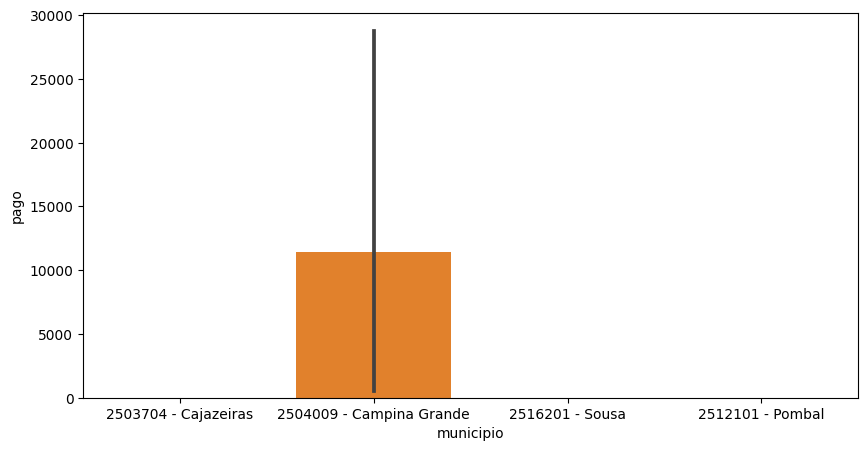

In [ ]:
plt.figure(figsize=(10,5))
# plt.subplot(1,2,1)
sns.barplot(data = municipiosInformados, x = "municipio", y = "pago")

# plt.subplot(1,2,2)
# sem_campina = municipiosInformados[municipiosInformados.municipio != "2504009 - Campina Grande"]
# sns.barplot(data = sem_campina, x = "municipio", y = "pago")

A grande maioria dos gastos foram direcionados a sede.

# Onde esse dinheiro realmente foi


In [ ]:
empenhados = municipiosInformados[municipiosInformados.empenhado != 0]
empenhados.municipio.value_counts()

2504009 - Campina Grande    27
2503704 - Cajazeiras         7
2512101 - Pombal             5
Name: municipio, dtype: int64

Parte da dotação desse pedaço dos gastos chegou a ser empenhado para outros municípios, mas efetivamente o orçamento só chegou para a sede.

In [ ]:
pagos = municipiosInformados[municipiosInformados.pago != 0]
pagos.municipio.value_counts()

2504009 - Campina Grande    8
Name: municipio, dtype: int64

In [ ]:
pagos.acao.value_counts()

8282 - Reestruturação e Expansão de Instituições Federais de Ensino Superior    6
20RK - Funcionamento de Instituições Federais de Ensino Superior                2
Name: acao, dtype: int64

In [ ]:
pagos.ano.value_counts().sort_index()

2012    2
2016    2
2018    1
2020    3
Name: ano, dtype: int64

Inteiramente para a sede, fundando reformas ou seu funcionamento normal.

#Conclusão

Nesse pequeno e estranho corte da tabela de gastos da UFCG, formada por gastos erroneamente marcados com seu municipio de destino(errados não por terem o município incorreto, mas por terem um minicípio informado em primeiro lugar), pouco pode ser aprendido. Nele encontramos a história do HUS, o Hospital Universitário do Sertão, que seria construído em Cajazeiras com o financiamento de 200 milhões de reais, mas até hoje sua construção não começou.

De fato, em 2021 a UFCG [devolveu o dinheiro ao tesouro nacional](https://coisasdecajazeiras.com.br/noticias/encerra-prazo-e-r-25-milhoes-para-novo-hospital-universitario-deverao-ser-devolvidos-ao-tesouro-nacional/) porque o governo não consegueria arcar os custos do hospital. Entretanto, no ano seguinte parte do dinheiro foi direcionado a expansão do HUJB.

Dos gastos analisados, os únicos realmente efetivados foram em Campina Grande, destinados a "Reestruturação e Expansão de Instituições Federais de Ensino Superior" ou simplesmente ao seu funcionamento normal.

